<a href="https://colab.research.google.com/github/mmishra1092/Credit-Card-Default-Prediction/blob/main/MAYANK_MISHRA_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Loading Dataset and Importing Packages

In [101]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Upload data path
working_path = '/content/drive/MyDrive/Module: 4/Week_4/Capstone Project: Supervised ML: Classification/default of credit card clients.xls'

In [104]:
# Read data
credit_data_df = pd.read_excel(working_path,header=1)

# Dataset Information and Summary

In [105]:
# View first 5 rows of dataset
credit_data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [106]:
# View last 5 rows of dataset
credit_data_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [107]:
# Lets know the shape of dataset
credit_data_df.shape

(30000, 25)

In [108]:
# Get all the features of dataset
credit_data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [109]:
# View all the information summary about the dataset
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [110]:
# Check the unique values
credit_data_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [111]:
# Check the description of the dataset
credit_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Insights:** Tha dataset has 30000 observations and 25 features.

*   default payment next month is our target variable




# Features Description:

*   ID : Id of every client.
*   LIMIT_BAL: Amount of the given credit (NT dollar): includes both the individual consumer credit and his/her family (supplementary) credit.
*   SEX: Gender (1 = male; 2 = female).
*   EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others.
*   MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
*   AGE: Age (year)

Scale of PAY_0 to PAY_6:



(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)


*   PAY_0: Repayment status in sep,2005 (scale same as above)
*   PAY_2: Repayment status in Aug,2005 (scale same as above)
*   PAY_3: Repayment status in July,2005 (scale same as above)
*   PAY_4: Repayment status in June,2005 (scale same as above)
*   PAY_5: Repayment status in May,2005 (scale same as above)
*   PAY_6: Repayment status in April,2005 (scale same as above)

*   BILL_AMT1: Amount of bill in sep,2005(NT dollar)
*   BILL_AMT2: Amount of bill in Aug,2005(NT dollar)
*   BILL_AMT3: Amount of bill in July,2005(NT dollar)
*   BILL_AMT4: Amount of bill in June,2005(NT dollar)
*   BILL_AMT5: Amount of bill in May,2005(NT dollar)
*   BILL_AMT6: Amount of bill in April,2005(NT dollar)


*   PAY_AMT1: Amount of previous statement in sep,2005(NT dollar)
*   PAY_AMT2: Amount of previous statement in Aug,2005(NT dollar)
*   PAY_AMT3: Amount of previous statement in July,2005(NT dollar)
*   PAY_AMT4: Amount of previous statement in June,2005(NT dollar)
*   PAY_AMT5: Amount of previous statement in May,2005(NT dollar)
*   PAY_AMT1: Amount of previous statement in April,2005(NT dollar)


*   default.payment.next.month: Default payment (1=yes, 0=no)

Our dataset has the observations of past 6 months of credit card transaction.


# Data Preprocessing

In [112]:
# Check the missing value
credit_data_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64



*   There are no null values present in our dataset



In [113]:
# Check duplicate values
len(credit_data_df[credit_data_df.duplicated()])

0

Insight: There are no duplicate and null values present in our dataset

In [114]:
# Replacing categorical variable name
credit_card_df=credit_data_df.replace({'SEX': {1 : 'male', 2 : 'female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                        'MARRIAGE' :{1 : 'married' , 2: 'single', 3: 'others'}})


# Exploratory Data Analysis

default payment next month: Analysis of dependent variable.

In [115]:
# Change the name of target variable
credit_data_df.rename(columns={'default payment next month':'default_payment_next_month'},inplace=True)

In [116]:
# Replace target variable observation 
default_payment =credit_data_df.replace({'default_payment_next_month': {0 : 'no', 1 : 'yes'}})

In [117]:
# Number of target variable
default_payment['default_payment_next_month'].value_counts()

no     23364
yes     6636
Name: default_payment_next_month, dtype: int64

In [118]:
# Customers who has default payment in next  month
default_payment['default_payment_next_month'].value_counts(normalize=True)

no     0.7788
yes    0.2212
Name: default_payment_next_month, dtype: float64

Here 0 is not default and 1 is default.

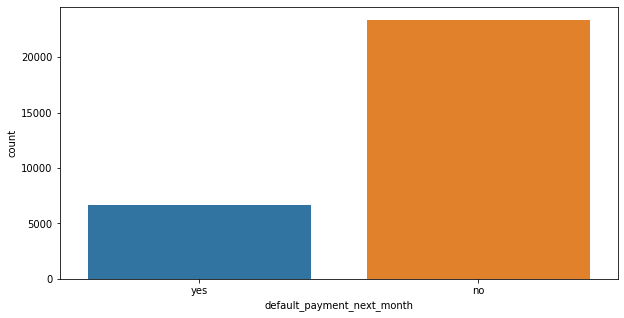

In [119]:
# Plot the graph of defaulter and non defaulter
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = default_payment)

Conclusion: From above plot we can conclude that defaulter are less in our dataset.

# Analysis of Independent variable



*   We have few categorical features in our dataset:
*   Sex
*   Education
*   Marriage
*   Age

# **Age**

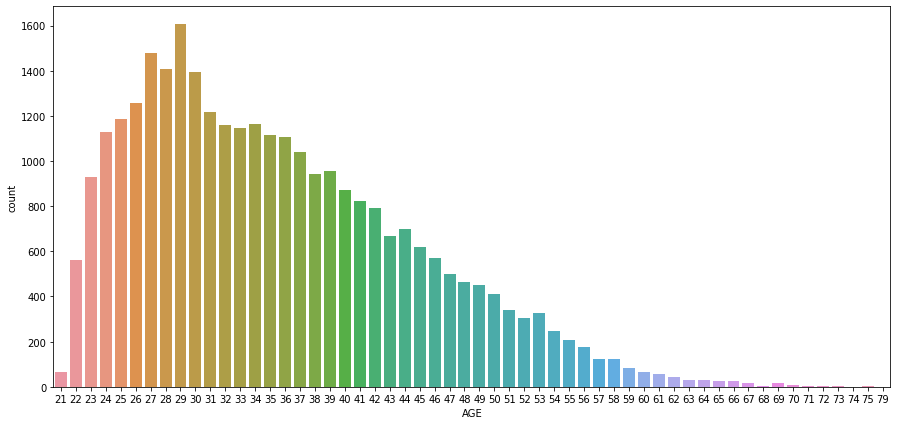

In [120]:
# Plot the graph of number of ages of people with credit card.
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_data_df)

Conclusion: From above plot we can see that people from age 24 to 36 uses more credit card. Above 60 years of age people rarely use credit card.

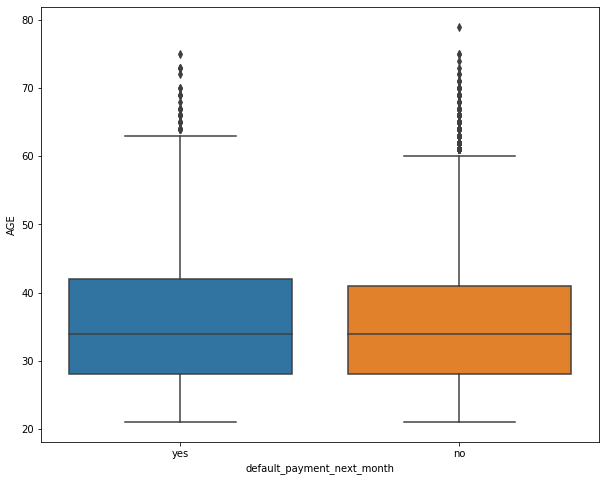

In [121]:
# Plot to check the data distribution
plt.figure(figsize=(10,8))
sns.boxplot(x = 'default_payment_next_month', y = 'AGE', data = default_payment)

# **Education**

1 = graduate school; 2 = university; 3 = high school; 0 = others

In [122]:
# Count the education variable in dataset
credit_card_df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
5                    280
others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

In [123]:
# Now combine 0,4,5 and 6 to 0 which is 'others' category
credit_card_df['EDUCATION'] = credit_card_df['EDUCATION'].replace({4:0,5:0,6:0})
credit_card_df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
0                    345
others               123
Name: EDUCATION, dtype: int64

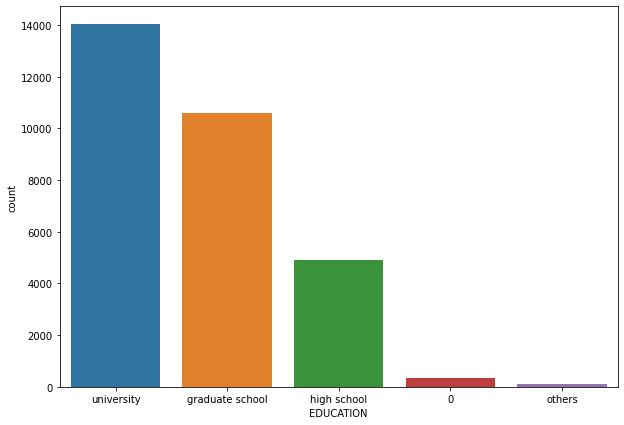

In [124]:
# Plotting the count plot
plt.figure(figsize=(10,7))
sns.countplot(x = 'EDUCATION', data = credit_card_df)

Conclusion: We can conclude by above plot that most number of credit card holders are university students.

# **Marriage**

In [125]:
# Count the variables of marriage
credit_card_df['MARRIAGE'].value_counts()

single     15964
married    13659
others       323
0             54
Name: MARRIAGE, dtype: int64


*   1 = married
*   2 = single
*   3 = others
*   But also there are 54 counts in 0, so we will combine 0 and 3 in other category.





In [126]:
# Combine 0 and 3
credit_data_df['MARRIAGE'] = credit_data_df['MARRIAGE'].replace({0:3})
credit_data_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

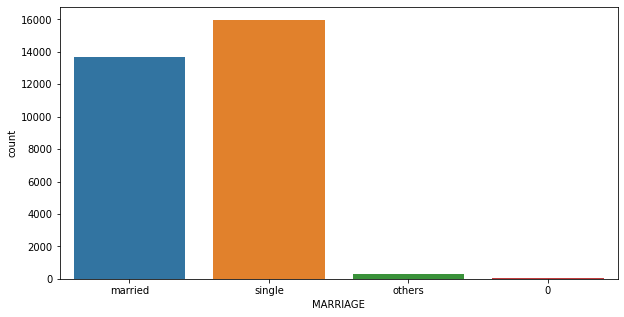

In [127]:
# Plot to view data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = credit_card_df)

Conclusion: From above plot we can see that most number of credit card are hold by people whose status is single.

# **Sex**



*   1: Male
*   2: Female



In [128]:
# Count of variables in dataset.
credit_data_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

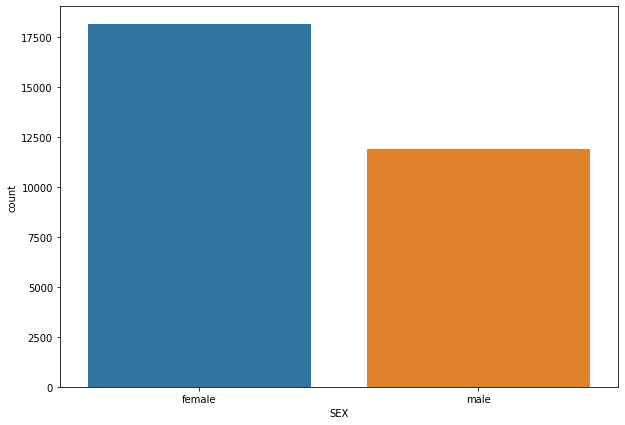

In [129]:
# Plot the graph
plt.figure(figsize=(10,7))
sns.countplot(x = 'SEX', data = credit_card_df)

Conclusion: From above plot we can conclude that number of female credit card holder are more than male.

# **Numerical Features**

Limit Balance

In [130]:
# Limit balance description
credit_data_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

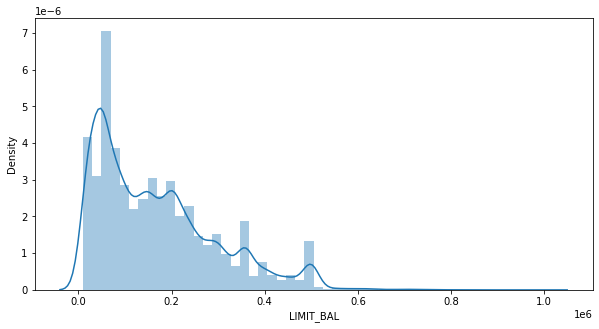

In [131]:
# Plotting distribution plot of Limit Bal.
plt.figure(figsize = (10,5))
sns.distplot(credit_data_df['LIMIT_BAL'], kde = True)

Conclusion: Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000

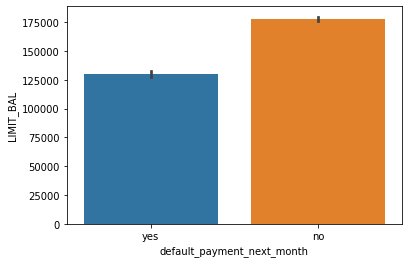

In [132]:
# View the data distribution with respect to target variable
sns.barplot(x = 'default_payment_next_month', y = 'LIMIT_BAL', data = default_payment)

In [133]:
# Rename the column for smooth process
credit_data_df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUNE','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace = True)
credit_data_df.rename(columns={'BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JULY','BILL_AMT4':'BILL_JUNE',
                               'BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR'},inplace = True)
credit_data_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE',
                               'PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [134]:
# check the information summary of dataset after renaming the column
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEP                     30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JULY                    30000 non-null  int64
 9   PAY_JUNE                    30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_SEP                    30000 non-null  int64
 13  BILL_AUG                    30000 non-null  int64
 14  BILL_J

Total Bill Amount


*   Pair plot: This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.



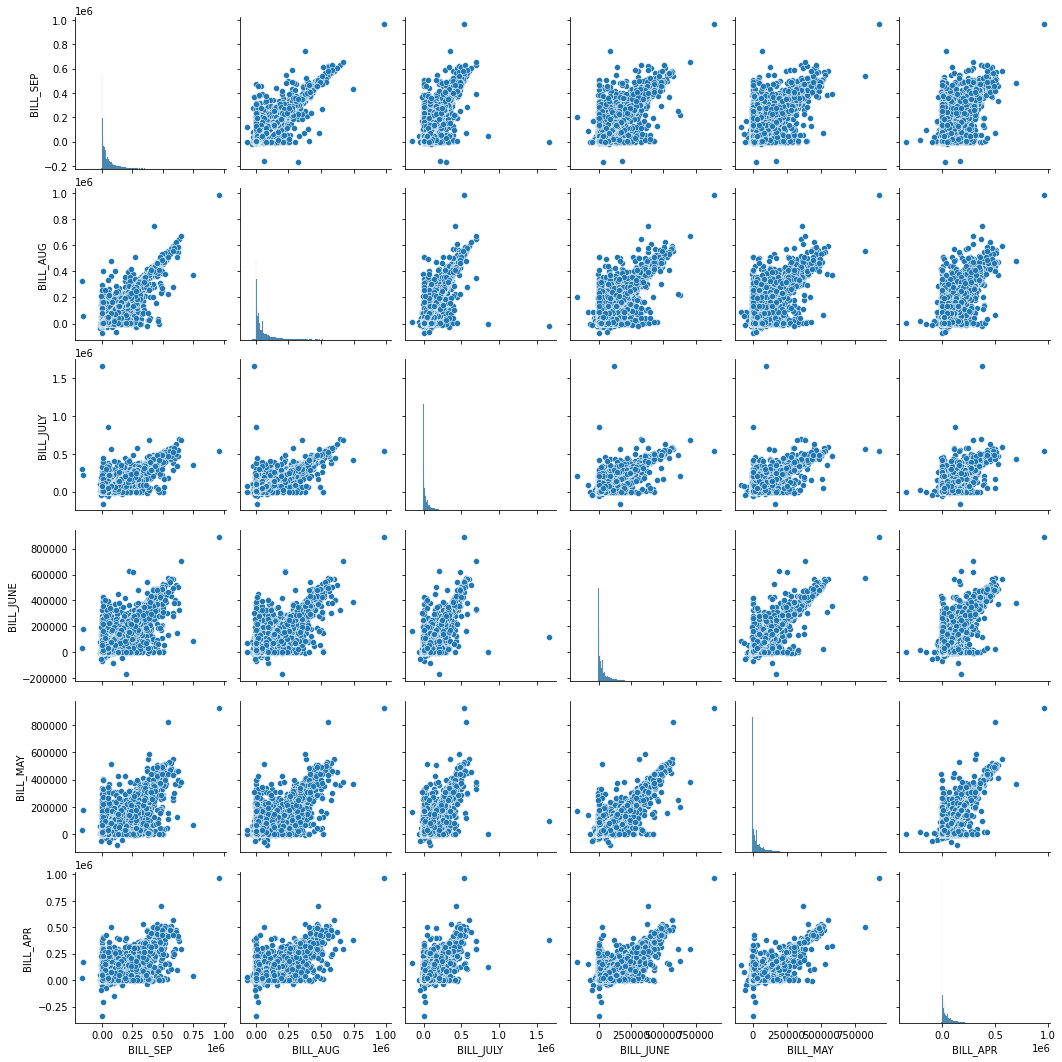

In [135]:
# Create a single variable for the bill amount and plot the pairplot 
total_bill_amt = credit_data_df[['BILL_SEP','BILL_AUG','BILL_JULY','BILL_JUNE','BILL_MAY','BILL_APR']]
sns.pairplot(data = total_bill_amt)

Previous Amount

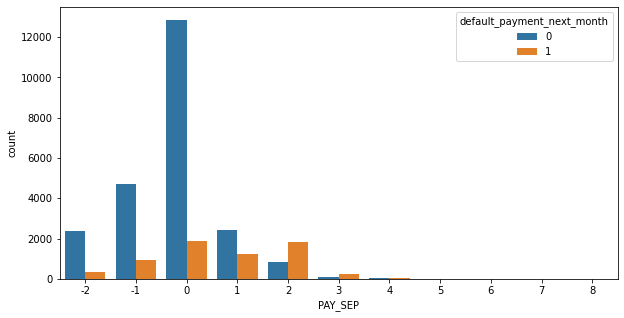

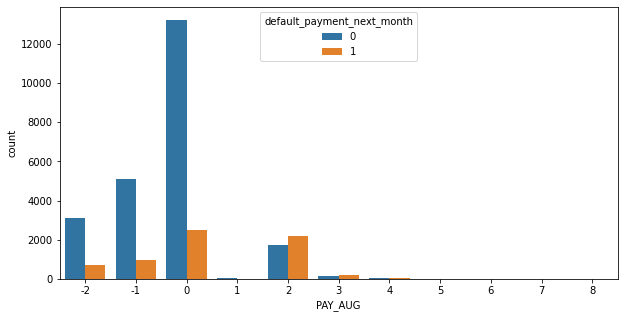

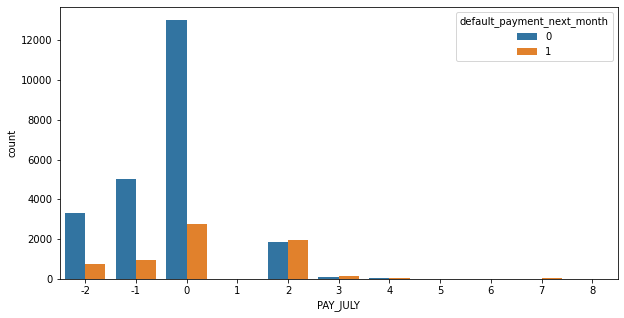

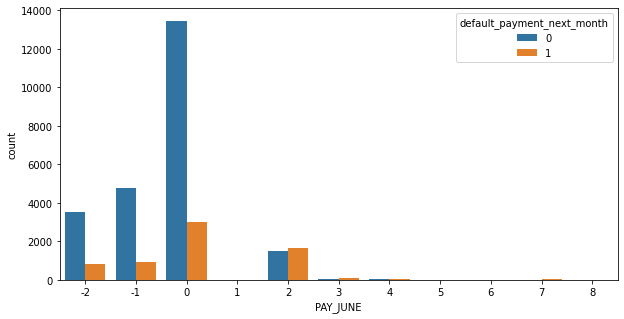

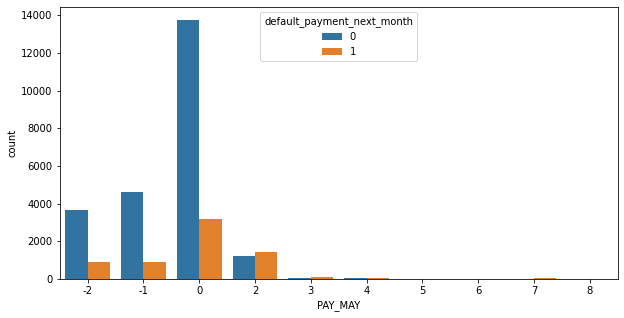

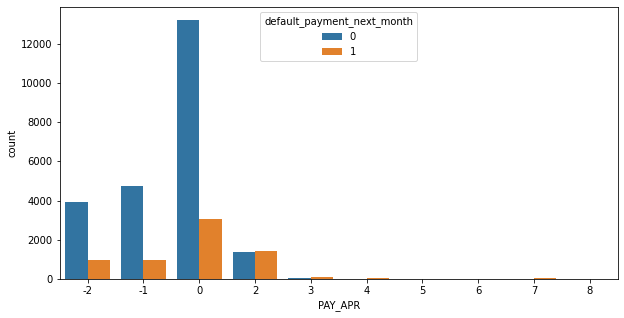

In [136]:
#plotting the count plot for Previous payment
previous_payment = ['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR']
for col in previous_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = credit_data_df)

Paid Amount

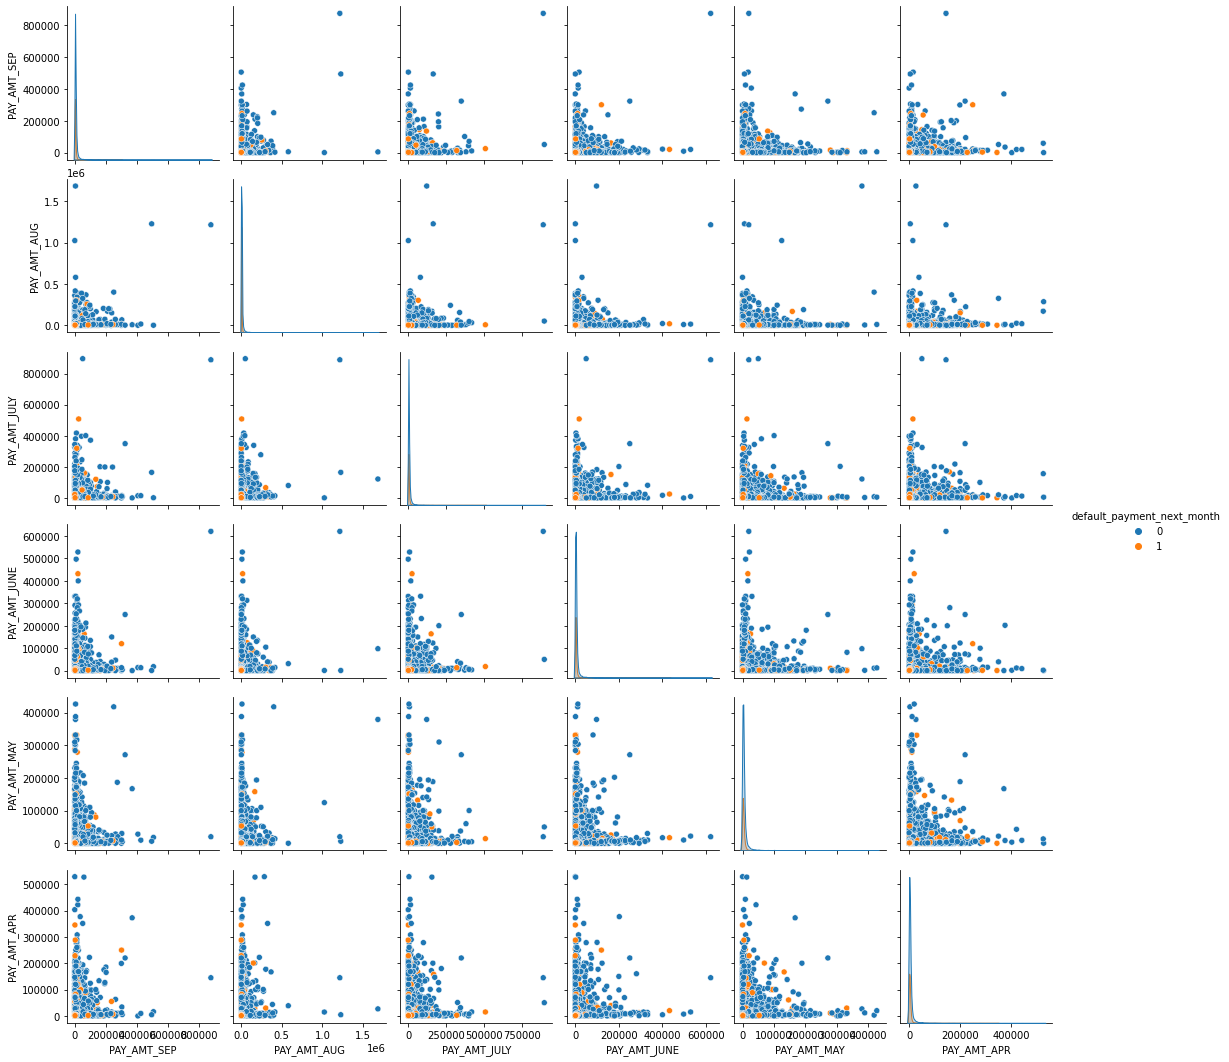

In [137]:
# Create a single variable and plot pairplot
paid_amt = credit_data_df[['PAY_AMT_SEP','PAY_AMT_AUG','PAY_AMT_JULY','PAY_AMT_JUNE','PAY_AMT_MAY','PAY_AMT_APR','default_payment_next_month']]
sns.pairplot(data = paid_amt, hue = 'default_payment_next_month')

Bivariate Analysis: It is one of the most simplest forms of analysis. It involves the analysis of two variable, for the purpose of determining the empirical relationship between them, also it can be helpful inn testing simple  hypothesis of association.

In [145]:
# Plotting cat plot show distribution with respect to target variable
cat_features_df = ['SEX','MARRIAGE','EDUCATION']

In [139]:
#cat_features_df = df[cat_var]

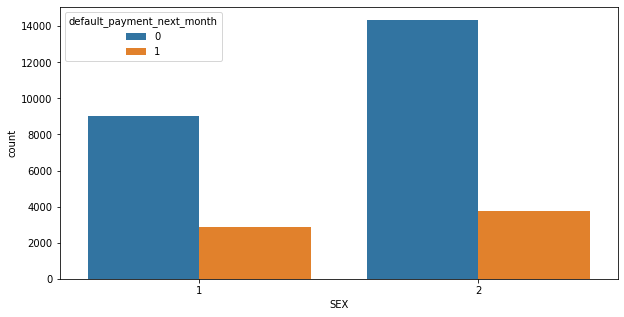

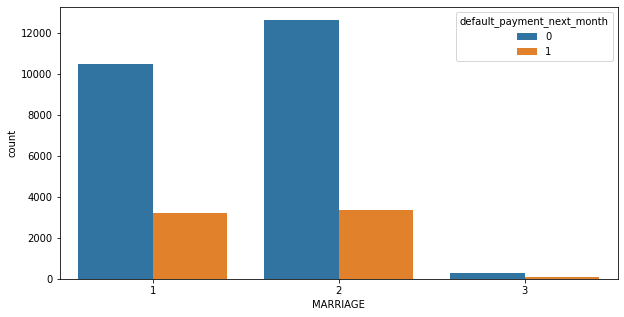

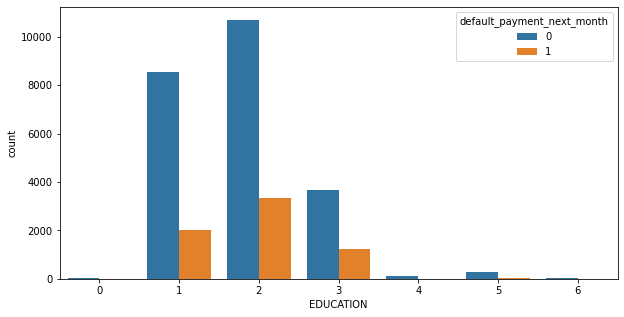

In [149]:
for col in cat_features_df:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, hue = 'default_payment_next_month', data = credit_data_df)